Regole di classificazione - Preprocessing Bank data

In [2]:
pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/fe/6b/db949ed5ac367987b1f250f070f340b7715d22f0c9c965bdf07de6ca75a3/scikit_learn-1.3.2-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for scipy>=1.5.0 from https://files.pythonhosted.org/packages/c6/a1/357e4cd43af2748e1e0407ae0e9a5ea8aaaa6b702833c81be11670dcbad8/scipy-1.11.4-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     ---------------------------------------- 60.4/60.4 kB 1.1 MB/s eta 0:00:00
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05c75f3f72


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score


df = pd.read_csv('bank-data.csv')
df.head()

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,ID12101,48,FEMALE,INNER_CITY,17546.0,NO,1,NO,NO,NO,NO,YES
1,ID12102,40,MALE,TOWN,30085.1,YES,3,YES,NO,YES,YES,NO
2,ID12103,51,FEMALE,INNER_CITY,16575.4,YES,0,YES,YES,YES,NO,NO
3,ID12104,23,FEMALE,TOWN,20375.4,YES,3,NO,NO,YES,NO,NO
4,ID12105,57,FEMALE,RURAL,50576.3,YES,0,NO,YES,NO,NO,NO


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           600 non-null    object 
 1   age          600 non-null    int64  
 2   sex          600 non-null    object 
 3   region       600 non-null    object 
 4   income       600 non-null    float64
 5   married      600 non-null    object 
 6   children     600 non-null    int64  
 7   car          600 non-null    object 
 8   save_act     600 non-null    object 
 9   current_act  600 non-null    object 
 10  mortgage     600 non-null    object 
 11  pep          600 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 56.4+ KB


Controlliamo se il df ha delle serie con valori nulli

In [12]:
df.isna().sum()

id             0
age            0
sex            0
region         0
income         0
married        0
children       0
car            0
save_act       0
current_act    0
mortgage       0
pep            0
dtype: int64

Come possiamo vedere nessuna serie ha valori nulli

Vediamo come varia la retribuzione media col variare dell'età

<Axes: xlabel='age', ylabel='income'>

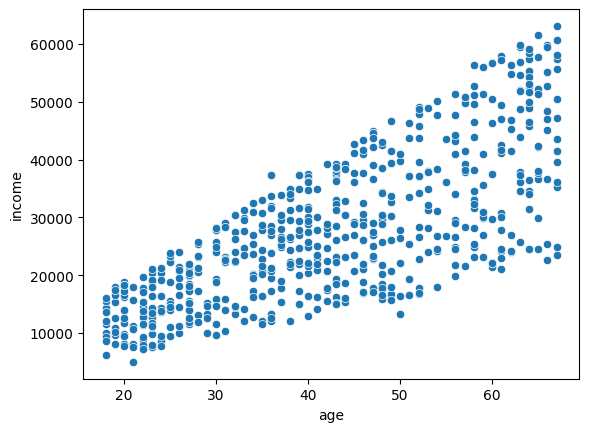

In [13]:
sns.scatterplot(data = df, x='age', y='income')

Ora controlliamo come varia la distribuzione Income - Children - PEP

<Axes: xlabel='age', ylabel='income'>

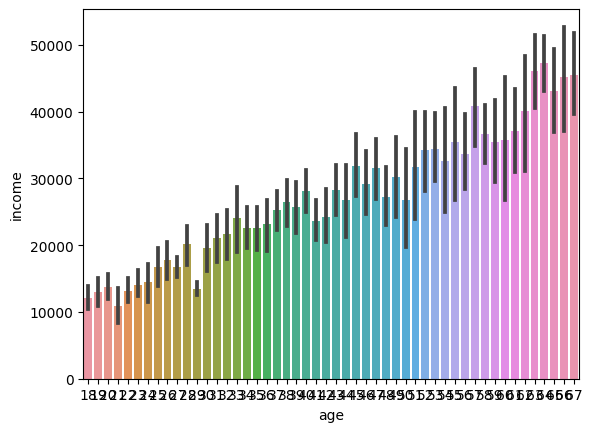

In [14]:
sns.barplot(data = df,x = "age", y="income")

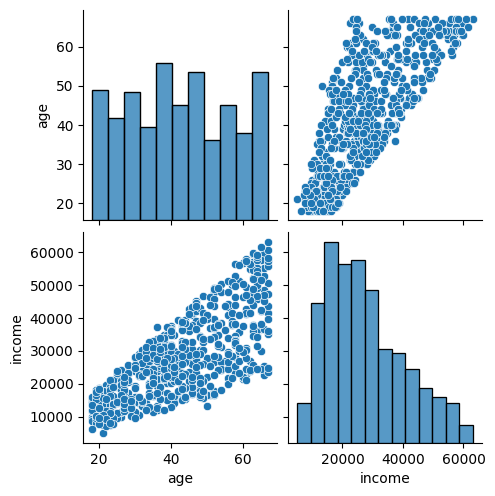

In [15]:
sns.pairplot(data = df[["age","income"]])

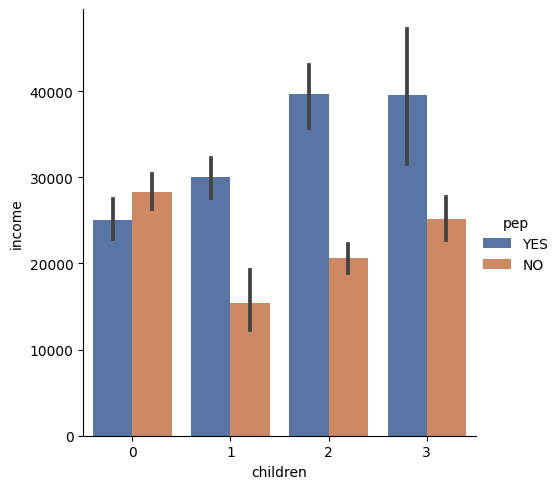

In [16]:
sns.catplot(data = df, x = "children", y = "income", hue = "pep", kind="bar",palette="deep")

Eliminiamo la serie ID del dataset e salviamo il nuovo soprannominandolo "data.arff"

In [23]:
bankdata = df.drop('id',axis=1)
bankdata.to_csv('bankdata.arff', index=False)
df1 = pd.read_csv('bankdata.arff')
df1

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,48,FEMALE,INNER_CITY,17546.00,NO,1,NO,NO,NO,NO,YES
1,40,MALE,TOWN,30085.10,YES,3,YES,NO,YES,YES,NO
2,51,FEMALE,INNER_CITY,16575.40,YES,0,YES,YES,YES,NO,NO
3,23,FEMALE,TOWN,20375.40,YES,3,NO,NO,YES,NO,NO
4,57,FEMALE,RURAL,50576.30,YES,0,NO,YES,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...
595,61,FEMALE,INNER_CITY,47025.00,NO,2,YES,YES,YES,YES,NO
596,30,FEMALE,INNER_CITY,9672.25,YES,0,YES,YES,YES,NO,NO
597,31,FEMALE,TOWN,15976.30,YES,0,YES,YES,NO,NO,YES
598,29,MALE,INNER_CITY,14711.80,YES,0,NO,YES,NO,YES,NO


Procediamo a creare un altro dataset in cui andiamo a discretizzare l'attributo "age" ( 10 bin ) e ne creiamo una nuova colonna

In [24]:
bankdata1 = bankdata.copy()
bankdata1['age'] = pd.qcut(bankdata['age'], q=11, labels=False, duplicates='drop')
bankdata1.to_csv('bankdata1.arff', index=False)
bankdata1

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,6,FEMALE,INNER_CITY,17546.00,NO,1,NO,NO,NO,NO,YES
1,4,MALE,TOWN,30085.10,YES,3,YES,NO,YES,YES,NO
2,7,FEMALE,INNER_CITY,16575.40,YES,0,YES,YES,YES,NO,NO
3,1,FEMALE,TOWN,20375.40,YES,3,NO,NO,YES,NO,NO
4,8,FEMALE,RURAL,50576.30,YES,0,NO,YES,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...
595,9,FEMALE,INNER_CITY,47025.00,NO,2,YES,YES,YES,YES,NO
596,2,FEMALE,INNER_CITY,9672.25,YES,0,YES,YES,YES,NO,NO
597,2,FEMALE,TOWN,15976.30,YES,0,YES,YES,NO,NO,YES
598,2,MALE,INNER_CITY,14711.80,YES,0,NO,YES,NO,YES,NO


In [25]:
# Applica la codifica one-hot encoding
df_encoded = pd.get_dummies(bankdata1['region'], prefix='region')

# Concatena il dataframe originale con quello codificato
df_concat = pd.concat([bankdata1, df_encoded], axis=1)

# Rimuove la colonna originale "Region"
bankdata1 = df_concat.drop('region', axis=1)

bankdata1['sex'] = bankdata1['sex'].map({'FEMALE': 0, 'MALE': 1})
bankdata1['married'] = bankdata1['married'].map({'NO': 0, 'YES': 1})
bankdata1['car'] = bankdata1['car'].map({'NO': 0, 'YES': 1})
bankdata1['save_act'] = bankdata1['save_act'].map({'NO': 0, 'YES': 1})
bankdata1['current_act'] = bankdata1['current_act'].map({'NO': 0, 'YES': 1})
bankdata1['mortgage'] = bankdata1['mortgage'].map({'NO': 0, 'YES': 1})
bankdata1['pep'] = bankdata1['pep'].map({'NO': 0, 'YES': 1})

In [26]:
def classificazione(dataframe):
    x = dataframe.drop("pep",axis=1)
    y= dataframe["pep"]
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,shuffle=True)
    
    y_test.value_counts()
    
    classifier = DecisionTreeClassifier()
    classifier.fit(x_train,y_train)
    y_pred= classifier.predict(x_test)
    
    plt.hist([y_pred,y_test], bins=[0,1,2,3,4,5], label = ["y_pred","y_test"], align = "left")
    plt.xticks([0,1])
    plt.yscale("linear")
    plt.title("Decision Tree Classifier")
    plt.legend()
    plt.show()

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

def classificazione1(dataframe):
    x = dataframe.drop("pep",axis=1)
    y= dataframe["pep"]
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,shuffle=True)
    
    y_test.value_counts()
    
    classifier = DecisionTreeClassifier(max_depth = None)
    classifier.fit(x_train,y_train)
    y_pred= classifier.predict(x_test)
    
    plt.hist([y_pred,y_test], bins=[0,1,2,3,4,5], label = ["y_pred","y_test"], align = "left")
    plt.xticks([0,1])
    plt.yscale("linear")
    plt.title("Decision Tree Classifier")
    plt.legend()
    plt.show()

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

def classificazione2(dataframe):
    x = dataframe.drop("pep",axis=1)
    y= dataframe["pep"]
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,shuffle=True)
    
    y_test.value_counts()
    
    classifier = DecisionTreeClassifier()
    classifier.fit(x_train,y_train)
    y_pred= classifier.predict(x_test)

    scores = cross_val_score(classifier, x, y, cv=10)
    ciao = pd.DataFrame(scores)
    ciao.hist()
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [28]:
# Applica la codifica one-hot encoding
df_encoded = pd.get_dummies(bankdata['region'], prefix='region')
# Concatena il dataframe originale con quello codificato
df_concat = pd.concat([bankdata, df_encoded], axis=1)
# Rimuove la colonna originale "Gender"
bankdata = df_concat.drop('region', axis=1)

bankdata['sex'] = bankdata['sex'].map({'FEMALE': 0, 'MALE': 1})
bankdata['married'] = bankdata['married'].map({'NO': 0, 'YES': 1})
bankdata['car'] = bankdata['car'].map({'NO': 0, 'YES': 1})
bankdata['save_act'] = bankdata['save_act'].map({'NO': 0, 'YES': 1})
bankdata['current_act'] = bankdata['current_act'].map({'NO': 0, 'YES': 1})
bankdata['mortgage'] = bankdata['mortgage'].map({'NO': 0, 'YES': 1})
bankdata['pep'] = bankdata['pep'].map({'NO': 0, 'YES': 1})

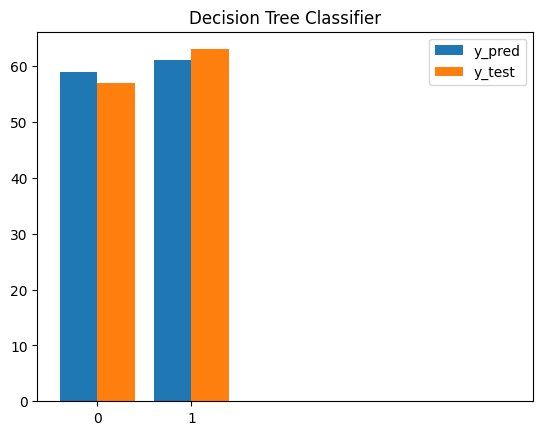

In [29]:
classificazione(bankdata1)

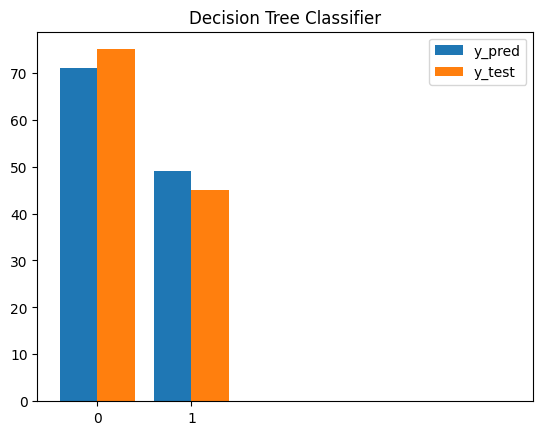

In [32]:
classificazione1(bankdata1)

Accuracy: 0.81 (+/- 0.09)


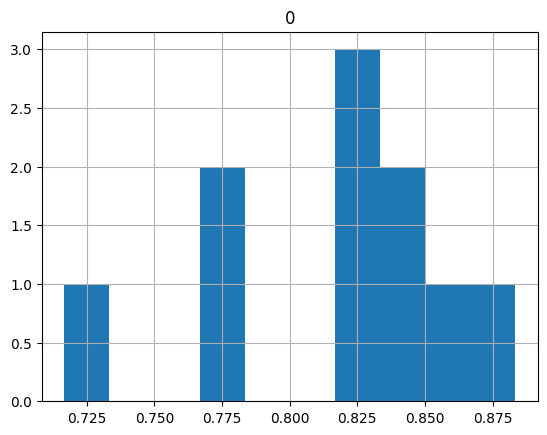

In [33]:
classificazione2(bankdata1)

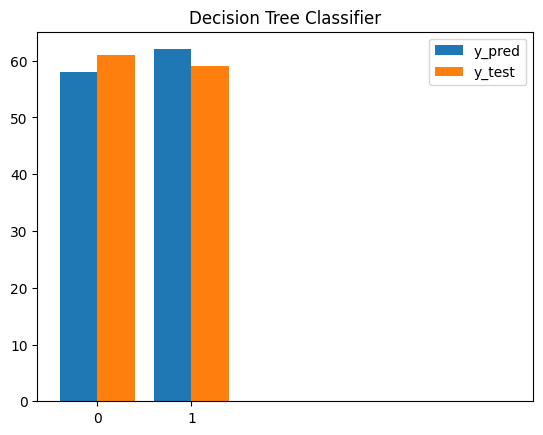

In [34]:
classificazione(bankdata)

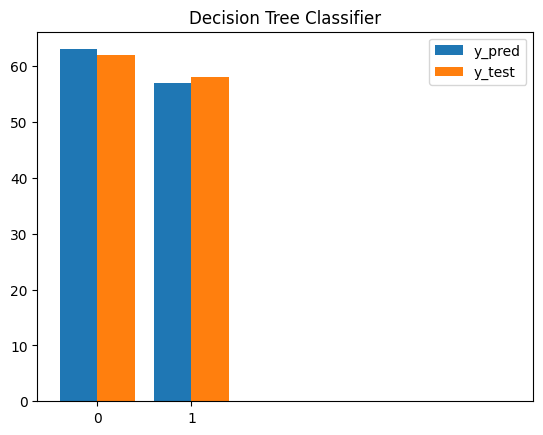

In [35]:
classificazione1(bankdata)

Accuracy: 0.82 (+/- 0.10)


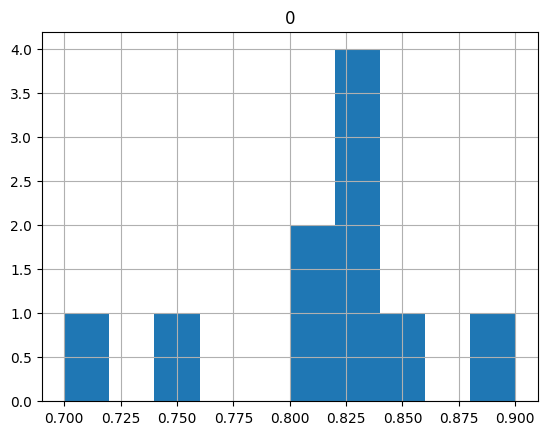

In [36]:
classificazione2(bankdata)

Andiamo ora a discretizzare anche l'attributo income, andando a vedere come si comporta il classificatore in questo caso

In [37]:
bankdata1["income"] = pd.qcut(bankdata1['income'], q=11, labels=False)

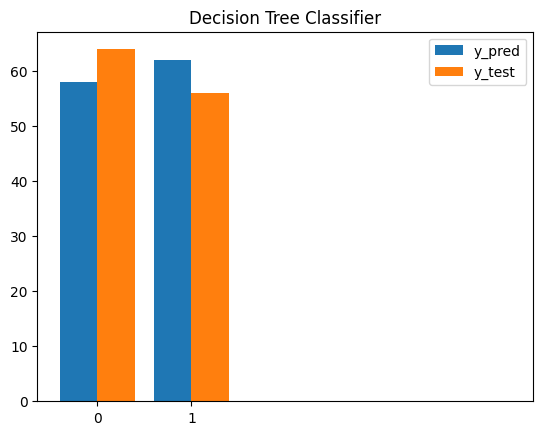

In [38]:
classificazione(bankdata1)

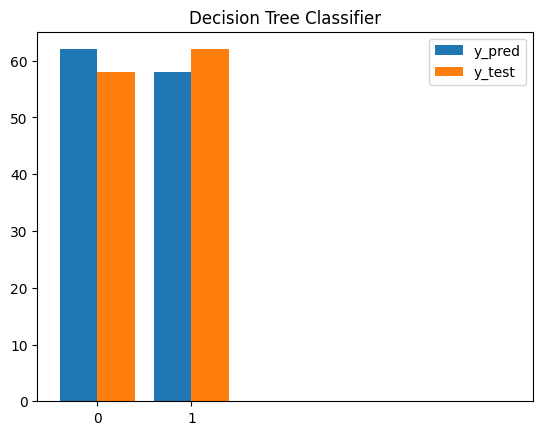

In [39]:
classificazione1(bankdata1)

Accuracy: 0.80 (+/- 0.08)


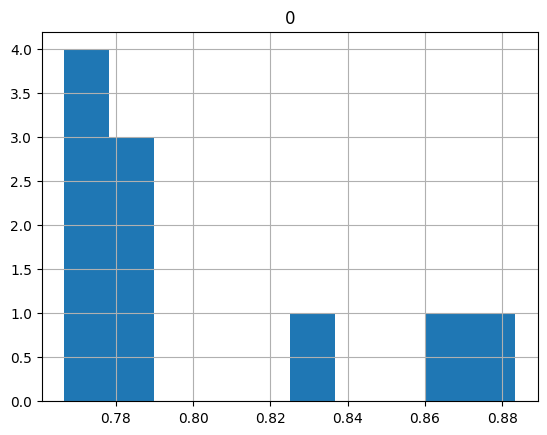

In [40]:
classificazione2(bankdata1)